In [ ]:
!pip install dgl
!pip install torch_geometric
#!pip install pandas google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import plotly.graph_objects as go

In [ ]:
df_10 = pd.read_csv("parsed_GMn_dataset.txt", sep=" ", header=None)

In [ ]:
column_names=["nevent","Number of Tracks Found","Number of good hits on all tracks","Hits on track 1","Hits on track 2","Hits on track 3","Track index","GEM Layer","Global X","Global Y",
              "Global X_Layer0","Global Y_Layer0","Layer0_On Track?",
              "Global X_Layer1","Global Y_Layer1","Layer1_On Track?",
              "Global X_Layer2","Global Y_Layer2","Layer2_On Track?",
              "Global X_Layer3","Global Y_Layer3","Layer3_On Track?",
              "Global X_Layer4","Global Y_Layer4","Layer4_On Track?"]

df_10.columns = column_names

In [ ]:
dataframes = [df_10]

adjustment = 0
result_dfs = []

for df_temp in dataframes:
    df_copy = df_temp.copy()
    df_copy['nevent'] += adjustment
    result_dfs.append(df_copy)

    adjustment = df_copy['nevent'].iloc[-1] + 1

df = pd.concat(result_dfs, axis=0, ignore_index=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_filtered = df

In [ ]:
df_filtered['nevent'].nunique()

27249

In [ ]:
import torch
import torch_geometric
from torch_geometric.data import Data
from scipy.spatial.distance import cdist

In [ ]:
df_filtered[28:55]

,nevent,Number of Tracks Found,Number of good hits on all tracks,Hits on track 1,Hits on track 2,Hits on track 3,Track index,GEM Layer,Global X,Global Y,Global X_Layer0,Global Y_Layer0,Layer0_On Track?,Global X_Layer1,Global Y_Layer1,Layer1_On Track?,Global X_Layer2,Global Y_Layer2,Layer2_On Track?,Global X_Layer3,Global Y_Layer3,Layer3_On Track?,Global X_Layer4,Global Y_Layer4,Layer4_On Track?
28,0,1,4,4,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.434887,-0.031446,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0
29,1,1,4,4,0.0,0.0,0.0,0.0,-0.027862,-0.148424,0.034841,-0.157578,0,-0.038954,-0.197938,0,-0.050486,-0.169855,0,0.000000,0.000000,0,-0.184572,-0.216359,0
30,1,1,4,4,0.0,0.0,0.0,1.0,-0.040144,-0.155581,0.012793,-0.195765,0,-0.038682,-0.155591,0,-0.054122,-0.163481,1,0.000000,0.000000,0,-0.184641,-0.229203,0
31,1,1,4,4,0.0,0.0,0.0,2.0,-0.054122,-0.163481,0.025865,-0.131600,0,-0.040416,-0.197929,0,0.000000,0.000000,0,0.000000,0.000000,0,-0.171760,-0.216428,0
32,1,1,4,4,0.0,0.0,0.0,4.0,-0.171829,-0.229272,0.000806,-0.175003,0,-0.040144,-0.155581,1,0.000000,0.000000,0,0.000000,0.000000,0,-0.171829,-0.229272,1
33,1,1,4,4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020237,-0.132283,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,-0.131996,-0.216641,0
34,1,1,4,4,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.001811,-0.170471,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0
35,1,1,4,4,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.005459,-0.176789,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0
36,1,1,4,4,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.008472,-0.182008,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0
37,1,1,4,4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019219,-0.130520,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0


In [ ]:
data_list = []

nevent = []
dataset = []
y = []
edges = []
dataset_2D = []
hit_layer = []
dist_test = []

print("SATRTING !!")

for event in range(df_filtered['nevent'].nunique()):
    if (df_filtered['nevent'].isin([event]).any()):
        df_portion = df_filtered[df_filtered['nevent']==event]

        layer = []
        layer_X = []
        layer_Y = []
        layer_Z = []
        target = []
        coordinates = [[], [], []]
        edge_index = []
        coordinates_2D = [[], []]

#if 0 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer0'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global X_Layer0'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global Y_Layer0'].values.tolist())
        layer_Z += [1] * ((df_portion['Global X_Layer0'] != 0).sum())
        layer += [0] * ((df_portion['Global X_Layer0'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]["Layer0_On Track?"].values.tolist())

#if 1 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer1'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global X_Layer1'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global Y_Layer1'].values.tolist())
        layer_Z += [2] * ((df_portion['Global X_Layer1'] != 0).sum())
        layer += [1] * ((df_portion['Global X_Layer1'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]["Layer1_On Track?"].values.tolist())


#if 2 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer2'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global X_Layer2'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global Y_Layer2'].values.tolist())
        layer_Z += [3] * ((df_portion['Global X_Layer2'] != 0).sum())
        layer += [2] * ((df_portion['Global X_Layer2'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]["Layer2_On Track?"].values.tolist())


#if 3 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer3'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global X_Layer3'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global Y_Layer3'].values.tolist())
        layer_Z += [4] * ((df_portion['Global X_Layer3'] != 0).sum())
        layer += [3] * ((df_portion['Global X_Layer3'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]["Layer3_On Track?"].values.tolist())


#if 4 in df_portion['GEM Layer'].values:
        nevent += [event] * ((df_portion['Global X_Layer4'] != 0).sum())
        layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global X_Layer4'].values.tolist())
        layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global Y_Layer4'].values.tolist())
        layer_Z += [5] * ((df_portion['Global X_Layer4'] != 0).sum())
        layer += [4] * ((df_portion['Global X_Layer4'] != 0).sum())
        target.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]["Layer4_On Track?"].values.tolist())

        coordinates[0].append(layer_X)
        coordinates[1].append(layer_Y)
        coordinates[2].append(layer_Z)

        column1 = np.array(coordinates)[0, 0]
        column2 = np.array(coordinates)[1, 0]
        column3 = np.array(coordinates)[2, 0]
        coordinates_array = np.column_stack((column1, column2, column3))
        coordinates_2D = np.array(np.column_stack((column1, column2)), dtype=np.float32)

        z_coordinates = coordinates_array[:, 2]

        #distances = 1 / (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)
        distances_z = (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)
        distances_2D = (cdist(coordinates_2D, coordinates_2D))

        dist_test.append(distances_2D)

        distance_threshold_z = 1.2
        distance_threshold_2D = 0.15

        edge_index = []
        for i in range(len(coordinates_array)):
            for j in range(i + 1, len(coordinates_array)):
                if distances_z[i, j] < distance_threshold_z:
                  if distances_2D[i, j] < distance_threshold_2D:
                    edge_index.append([i, j])
                    edge_index.append([j, i])
        edge_index = np.array(edge_index).T


#### ########### ########### ########### ########### ########### ########### ########### ###########
#### FILTER FOR REACH OF THE LINKS(Set to consider events that has hits on layers - 0,1,2,3,4) ######
#### ########### ########### ########### ########### ########### ########### ########### ###########
        indices = [i for i, value in enumerate(target) if value == 1]

        # Get the corresponding values in the 'layer' array
        corresponding_layer_values = [layer[i] for i in indices]

        event_data = {
            #'coordinates': coordinates,
            'coordinates_2D': coordinates_2D,
            'target': target,
            'edge_index': edge_index,
            'layer': layer
        }

        if (corresponding_layer_values == [0, 1, 2, 3, 4]):
          data_list.append(event_data)

SATRTING !!


KeyboardInterrupt: ignored

In [ ]:
distances_z

array([[0.1, 0.1, 0.1, ..., 4.1, 4.1, 4.1],
       [0.1, 0.1, 0.1, ..., 4.1, 4.1, 4.1],
       [0.1, 0.1, 0.1, ..., 4.1, 4.1, 4.1],
       ...,
       [4.1, 4.1, 4.1, ..., 0.1, 0.1, 0.1],
       [4.1, 4.1, 4.1, ..., 0.1, 0.1, 0.1],
       [4.1, 4.1, 4.1, ..., 0.1, 0.1, 0.1]])

In [ ]:
df_portion

NameError: ignored

In [ ]:
processed_data_list = []

for event_data in data_list:
    if 8<len(event_data['target'])<120:
      #coordinates_tensor = torch.tensor(event_data['coordinates'], dtype=torch.float32)
      coordinates_2D_tensor = torch.tensor(event_data['coordinates_2D'], dtype=torch.float)
      target_tensor = torch.tensor(event_data['target'], dtype=torch.int64)
      edge_index_tensor = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      layer_tensor = torch.tensor(event_data['layer'], dtype=torch.int64)



      consecutive_ones = torch.where(target_tensor == 1)[0]
      edges = []
      for i in range(len(consecutive_ones) - 1):
          edges.append([consecutive_ones[i], consecutive_ones[i + 1]])
      edge_index = torch.tensor(edges).t()

      #edge_index_tensor_can = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      edge_index_tensor_can = (event_data['edge_index'])

      num_nodes = edge_index_tensor_can.max().item() + 1

      print(edge_index_tensor_can)
      print(num_nodes)
      print()

      # Create a set to keep track of visited edges
      visited_edges = set()

      # Create a list to store filtered edges
      filtered_edges = []

      # Iterate through each edge
      for edge in edge_index_tensor_can.T:
          src, dest = edge.tolist()

          # Check if the reverse edge has been visited
          if (dest, src) not in visited_edges:
              visited_edges.add((src, dest))
              filtered_edges.append(edge)

      # Convert the filtered edges back to a tensor
      filtered_edge_index_tensor = torch.tensor(filtered_edges).T

      edges_set = {tuple(e.tolist()) for e in edge_index.t()}

      # Filter out edges that need to be removed
      filtered_edges = [e for e in filtered_edge_index_tensor.t() if tuple(e.tolist()) not in edges_set]

      # Convert filtered_edges back to a tensor
      edge_index_neg = torch.stack(filtered_edges, dim=1)

      data = Data(
          #x=coordinates_tensor,
          x_2d=coordinates_2D_tensor,
          y=target_tensor,
          edge_index=edge_index,
          edge_index_neg = edge_index_neg,
          edge_index_can=filtered_edge_index_tensor,
          layer=layer_tensor
      )

      processed_data_list.append(data)

[[ 0  1  0  2  1  2  2  3  2  4  2  5  2  6  2  7  3  4  3  5  3  6  3  7
   3  8  3  9  3 10  3 11  4  5  4  6  4  7  4  8  4  9  4 10  4 11  5  6
   5  7  5  8  5  9  5 10  5 11  6  7  6  8  6  9  6 10  6 11  7  8  7  9
   7 10  7 11  8  9  8 10  8 11  8 12  8 13  9 10  9 11  9 12  9 13 10 11
  10 12 10 13 11 12 11 13 12 13]
 [ 1  0  2  0  2  1  3  2  4  2  5  2  6  2  7  2  4  3  5  3  6  3  7  3
   8  3  9  3 10  3 11  3  5  4  6  4  7  4  8  4  9  4 10  4 11  4  6  5
   7  5  8  5  9  5 10  5 11  5  7  6  8  6  9  6 10  6 11  6  8  7  9  7
  10  7 11  7  9  8 10  8 11  8 12  8 13  8 10  9 11  9 12  9 13  9 11 10
  12 10 13 10 12 11 13 11 13 12]]
14

[[ 0  1  0  2  0  3  0  4  0  5  0  6  0  7  0  8  1  2  1  3  1  4  1  5
   1  6  1  7  1  8  2  3  2  4  2  5  2  6  2  7  2  8  3  4  3  5  3  6
   3  7  3  8  4  5  4  6  4  7  4  8  5  6  5  7  5  8  6  7  6  8  6  9
   6 10  6 11  6 12  6 13  6 14  7  8  7  9  7 10  7 11  7 12  7 13  7 14
   8  9  8 10  8 11  8 12  8 13  8 14  9 

KeyboardInterrupt: ignored

In [ ]:
for data in processed_data_list:
  print(data.x_2d)
  print(data.y)

tensor([[ 0.4925, -0.1131],
        [ 0.4887, -0.1196],
        [ 0.5021, -0.1247],
        [ 0.5369, -0.0966],
        [ 0.5172, -0.1304],
        [ 0.5126, -0.1382],
        [ 0.4893, -0.1074],
        [ 0.4772, -0.1282],
        [ 0.5782, -0.1358],
        [ 0.5730, -0.1358],
        [ 0.5517, -0.1357],
        [ 0.5314, -0.1356],
        [ 0.6349, -0.1942],
        [ 0.6479, -0.1816]])
tensor([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])
tensor([[ 0.2829, -0.0976],
        [ 0.2208, -0.1500],
        [ 0.2172, -0.1562],
        [ 0.2319, -0.0793],
        [ 0.2125, -0.1128],
        [ 0.2023, -0.1304],
        [ 0.2141, -0.1602],
        [ 0.2143, -0.1332],
        [ 0.2144, -0.1167],
        [ 0.2159, -0.1765],
        [ 0.2127, -0.1820],
        [ 0.2122, -0.1828],
        [ 0.2113, -0.1812],
        [ 0.2163, -0.1213],
        [ 0.2001, -0.1490],
        [ 0.2182, -0.1254],
        [ 0.2140, -0.1134],
        [ 0.2139, -0.1266],
        [ 0.2138, -0.1606],
        [ 0.2363, -0.113

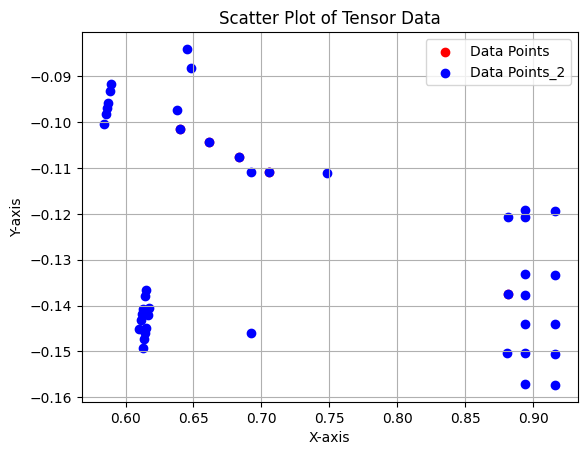

In [ ]:
data = np.array([[ 0.6402, -0.1014],
        [ 0.6611, -0.1042],
        [ 0.6836, -0.1076],
        [ 0.7055, -0.1108],
        [ 0.8810, -0.1375]])

data_2 = np.array([[ 0.6479, -0.0881],
        [ 0.6402, -0.1014],
        [ 0.6176, -0.1406],
        [ 0.6168, -0.1420],
        [ 0.6152, -0.1448],
        [ 0.6145, -0.1459],
        [ 0.6138, -0.1472],
        [ 0.6126, -0.1492],
        [ 0.6455, -0.0840],
        [ 0.6379, -0.0973],
        [ 0.6152, -0.1365],
        [ 0.6144, -0.1379],
        [ 0.6128, -0.1407],
        [ 0.6122, -0.1418],
        [ 0.6114, -0.1431],
        [ 0.6102, -0.1452],
        [ 0.5893, -0.0917],
        [ 0.5885, -0.0931],
        [ 0.5869, -0.0959],
        [ 0.5863, -0.0969],
        [ 0.5855, -0.0983],
        [ 0.5844, -0.1003],
        [ 0.6611, -0.1042],
        [ 0.6836, -0.1076],
        [ 0.7481, -0.1110],
        [ 0.7055, -0.1108],
        [ 0.6925, -0.1459],
        [ 0.6926, -0.1108],
        [ 0.8811, -0.1206],
        [ 0.8810, -0.1375],
        [ 0.8809, -0.1503],
        [ 0.8939, -0.1192],
        [ 0.8939, -0.1207],
        [ 0.8938, -0.1332],
        [ 0.8938, -0.1376],
        [ 0.8938, -0.1440],
        [ 0.8938, -0.1504],
        [ 0.8937, -0.1572],
        [ 0.9161, -0.1193],
        [ 0.9161, -0.1333],
        [ 0.9160, -0.1441],
        [ 0.9160, -0.1505],
        [ 0.9159, -0.1573]])

x = data[:, 0]
y = data[:, 1]

p = data_2[:, 0]
q = data_2[:, 1]

# Create a scatter plot
plt.scatter(x, y, label="Data Points", color='r', marker='o')
plt.scatter(p, q, label="Data Points_2", color='b', marker='o')

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Tensor Data")

# Show the plot
plt.grid(True)
plt.legend()
plt.show()